# Image Classifier Using the Sequential API
Example from Hands-On ML

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [2]:
print(tf.__version__)
print(keras.__version__)

2.0.0
2.2.4-tf


## Load the Fashion MNIST dataset
* Every image is an array of 28x28 pixels
* Each pixel are integers from 0 to 155

In [3]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


Now we create a validation and training sets, and normalizing it for Gradient Descent

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:] 

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
class_names[y_train[0]]

'Coat'

## Use the sequential model to build the NN

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),   # Reshapes input, could use InputLayer
    keras.layers.Dense(300, activation="relu"),   # Hidden layer with 300 neurons
    keras.layers.Dense(100, activation="relu"),   # Hideden layer with 100 neurons
    keras.layers.Dense(10, activation="softmax"), # Output Layer with softmax since classes are exclusive
])

In [21]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [24]:
history = model.fit(X_train, y_train, epochs=5,
                   validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 6s 106us/sample - loss: 0.3753 - accuracy: 0.8666 - val_loss: 0.3709 - val_accuracy: 0.8726
Epoch 2/5
55000/55000 [==============================] - 6s 103us/sample - loss: 0.3627 - accuracy: 0.8714 - val_loss: 0.3618 - val_accuracy: 0.8730
Epoch 3/5
55000/55000 [==============================] - 6s 105us/sample - loss: 0.3512 - accuracy: 0.8745 - val_loss: 0.3500 - val_accuracy: 0.8798
Epoch 4/5
55000/55000 [==============================] - 6s 104us/sample - loss: 0.3413 - accuracy: 0.8782 - val_loss: 0.3476 - val_accuracy: 0.8796
Epoch 5/5
55000/55000 [==============================] - 6s 104us/sample - loss: 0.3331 - accuracy: 0.8803 - val_loss: 0.3512 - val_accuracy: 0.8778


In [27]:
weights, biases = model.layers[1].get_weights()
print(weights.shape)
print(biases.shape)

(784, 300)
(300,)


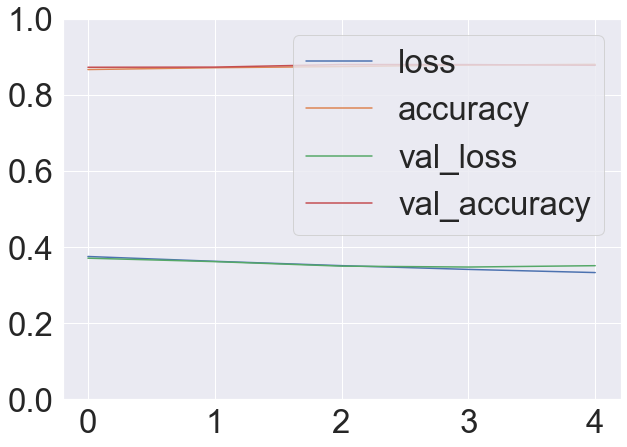

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style and fonts
sns.set_style("whitegrid")
sns.set(font_scale=3)

pd.DataFrame(history.history).plot(figsize=(10,7))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [31]:
model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[71.20634586486817, 0.8262]

In [36]:
X_new = X_test[:30]
y_proba = model.predict(X_new)
print(y_proba.round(2))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [34]:
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


In [35]:
print(y_test[:3])

[9 2 1]
